<a href="https://colab.research.google.com/github/jnagabooshanam-hub/ChurnPrediction_Project/blob/Piyush%2Fheatmap-generation/logistic_regression_and_correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jnagabooshanam-hub/ChurnPrediction_Project/blob/main/src/Correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial data load

In [ ]:
from io import BytesIO
from urllib.request import urlopen
import ssl
import pandas as pd
import certifi
url = "https://raw.githubusercontent.com/jnagabooshanam-hub/ChurnPrediction_Project/main/.github/workflows/Customer-Churn.csv"

ctx = ssl.create_default_context(cafile=certifi.where())

with urlopen(url, context=ctx) as r:
    data = pd.read_csv(BytesIO(r.read()), on_bad_lines="skip")

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
print(f"Parsed file containing \n{data.count().to_string()} rows \nAnd {data.columns.size} columns.")

data = data.dropna()

Parsed file containing 
customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043 rows 
And 21 columns.


## Assigning ordinals to textual columns

In [ ]:
data_encoded = data.copy()

for col in data_encoded.columns:
    if data_encoded[col].dtype == "object":
        data_encoded[col] = data_encoded[col].astype("category").cat.codes

## Generating a full Correlation Heatmap

(20, 20)


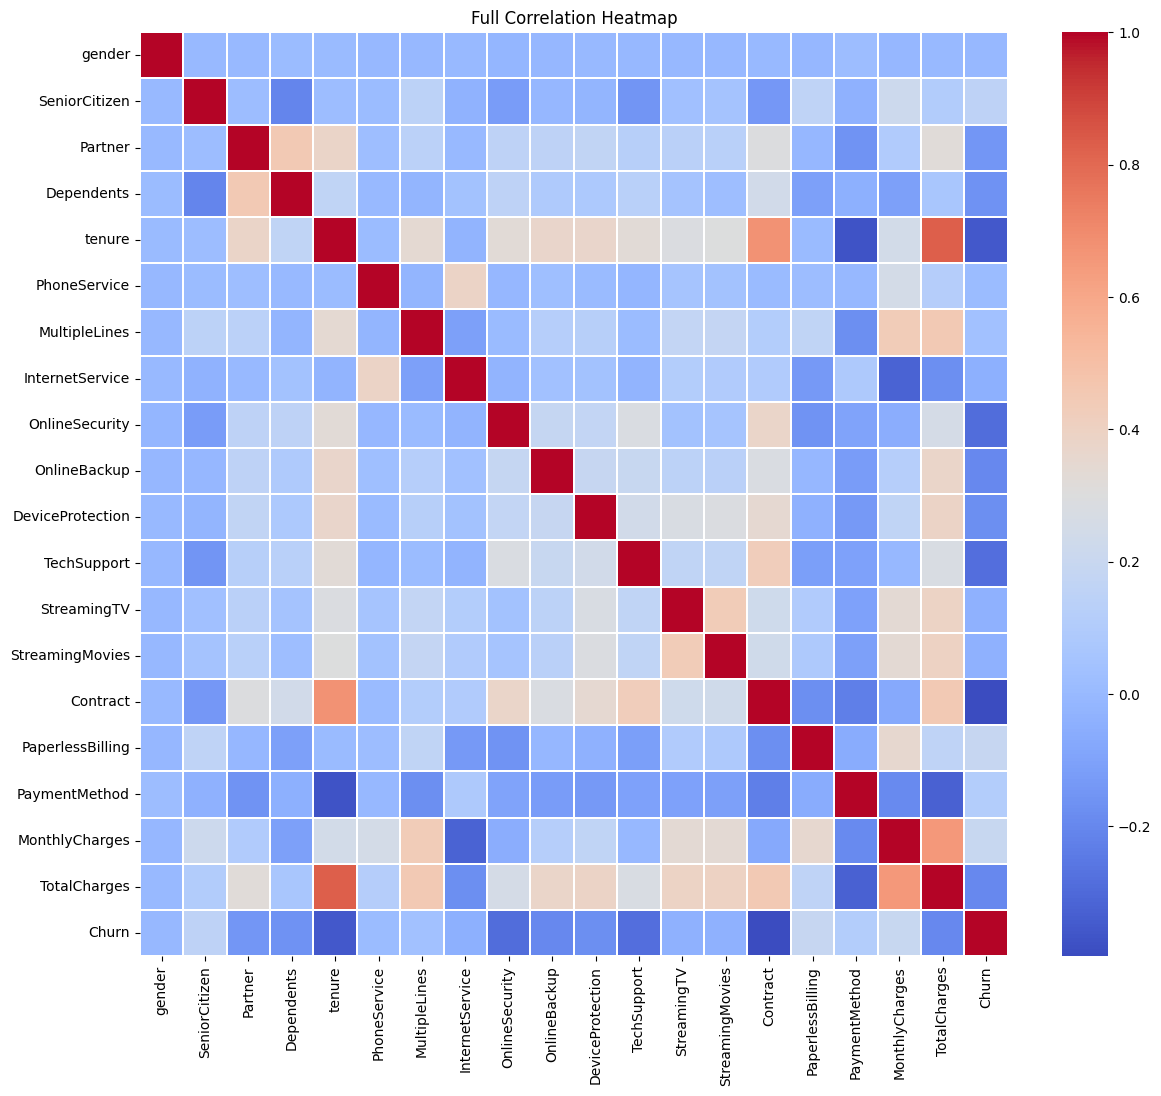

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_to_process = data_encoded.drop(columns=["customerID"])

data_to_process["TotalCharges"] = pd.to_numeric(data_to_process["TotalCharges"], errors="coerce")

df_encoded = pd.get_dummies(data_to_process, drop_first=False)

corr = df_encoded.corr()

print(corr.shape)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.3
)

plt.title("Full Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

### Reviewing the heatmap

The correlation heatmap illustrates the pairwise linear relationships among all variables in the dataset, with most features showing weak to moderate associations, indicating limited overall multicollinearity.
- Strong positive correlations are observed among numeric billing variables, particularly between tenure and TotalCharges, suggesting that longer customer retention is associated with increased cumulative spending.
- Demographic attributes (e.g., gender, partner status, dependents) display minimal correlations with other variables, implying relatively low direct linear influence within the dataset.
- A dense cluster of correlations appears among internet-related service features, reflecting structural dependencies created by bundled services and one-hot encoding of categorical variables.
- Contract types and payment methods exhibit negative correlations with alternative categories, which is expected due to their mutually exclusive nature rather than substantive behavioural relationships.
- Variables associated with longer-term commitments and service support tend to show negative relationships with churn, whereas higher-cost or flexible service options demonstrate positive associations, highlighting potential predictors for customer retention modeling.

## Generating a Churn-Focused Heatmap (Feature × Target)

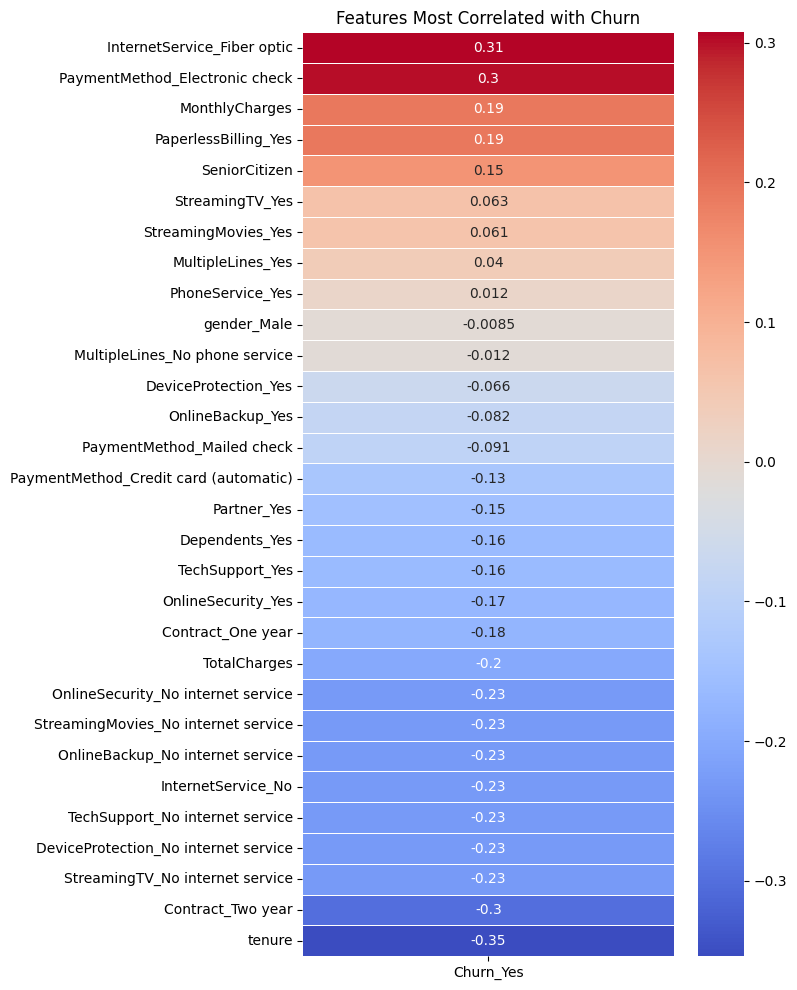

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_to_process = data.drop(columns=["customerID"])

data_to_process["TotalCharges"] = pd.to_numeric(data_to_process["TotalCharges"], errors="coerce")

df_encoded = pd.get_dummies(data_to_process, drop_first=True)

corr = df_encoded.corr()

churn_corr = corr[["Churn_Yes"]].sort_values(
    by="Churn_Yes",
    ascending=False
)

churn_corr = churn_corr.drop(index="Churn_Yes")

plt.figure(figsize=(6,12))

sns.heatmap(
    churn_corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Features Most Correlated with Churn")
plt.show()

In [ ]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


Accuracy Metrics: 0.7263681592039801
ROC AUC Curve 0.8349765233911922

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



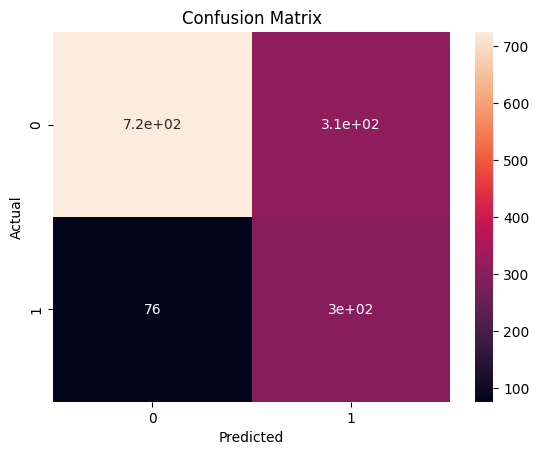

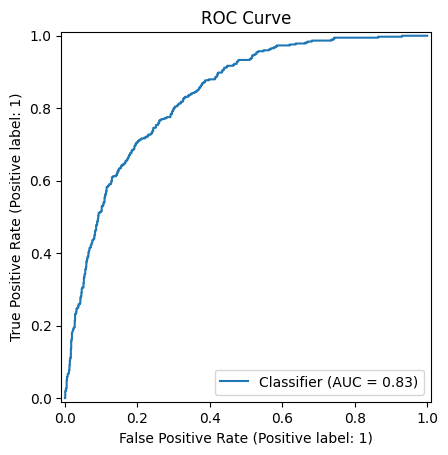


Top Drivers of Churn:

                                  Feature  Coefficient
10            InternetService_Fiber optic     0.746144
3                            TotalCharges     0.623279
21                        StreamingTV_Yes     0.259691
23                    StreamingMovies_Yes     0.252870
9                       MultipleLines_Yes     0.202763
28         PaymentMethod_Electronic check     0.193697
26                   PaperlessBilling_Yes     0.124250
0                           SeniorCitizen     0.075306
17                   DeviceProtection_Yes     0.069476
27  PaymentMethod_Credit card (automatic)     0.029226
29             PaymentMethod_Mailed check     0.023623
8          MultipleLines_No phone service     0.001330
7                        PhoneService_Yes    -0.001330
4                             gender_Male    -0.005694
15                       OnlineBackup_Yes    -0.017882


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

data = data_to_process.copy()

#Encoding
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy Metrics:", accuracy_score(y_test, y_pred))
print("ROC AUC Curve", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")
plt.show()

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Drivers of Churn:\n")
print(coefficients.head(15))




## Reviewing the heatmap:

- The heatmap presents the strength and direction of linear relationships between individual features and the target variable Churn_Yes, with correlations ranging from moderately positive (red tones) to moderately negative (blue tones).
- Features such as InternetService_Fiber optic and PaymentMethod_Electronic check show the strongest positive correlations with churn, suggesting that customers using higher-cost internet services or manual payment methods may exhibit a greater tendency to leave.
- Moderate positive associations are also observed for MonthlyCharges, PaperlessBilling_Yes, and SeniorCitizen, indicating that higher billing intensity and certain customer segments may be linked to increased churn likelihood.
- Negative correlations are strongest for tenure and Contract_Two year, implying that long-term customers and those on extended contracts are less likely to churn. Additional retention-related signals appear for OnlineSecurity_Yes, TechSupport_Yes, and Dependents_Yes.
- Several “No internet service” variables display similar negative correlations due to structural encoding effects, reflecting mutually exclusive service configurations rather than independent behavioural drivers.